# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [34]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [38]:
# set up lists to hold reponse info

temp = []
cloudiness = []   
humidity = [] 
lat = []
lng = []         
max_temp = []      
wind_speed = []
good_cities = []

# Loop through the list of cities and perform a request for data on each

for city in cities:
    response = requests.get(query_url + city).json()  
    try:             
        temp.append(response["main"]["temp"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        good_cities.append(response["name"])
        print(f"processing {city}")
    except KeyError:
        print(f"No {city} found.")
        
        



processing bluff
processing sal rei
processing nome
processing mehamn
processing east london
processing vaini
processing hobart
No mys shmidta found.
processing crystal beach
processing ostrovnoy
No palabuhanratu found.
processing mayumba
processing hithadhoo
processing ushuaia
processing atuona
No tsihombe found.
No kamenskoye found.
processing klaksvik
processing castro
processing walvis bay
processing punta arenas
processing albany
processing dikson
processing coihaique
processing baruun-urt
No dzhusaly found.
processing rikitea
processing pevek
processing guerrero negro
processing adrar
processing hokitika
processing tiksi
processing upernavik
processing airai
processing raglan
processing ucluelet
processing tuatapere
processing new norfolk
processing puerto ayora
processing biltine
processing chervone
processing ballitoville
processing aracuai
No belushya guba found.
processing cururupu
processing clyde river
processing port elizabeth
No nguiu found.
processing avarua
processing d

processing hanzhong
processing aswan
processing nabire
No rungata found.
processing suntar
processing warren
processing okha
processing mount gambier
processing norsup
processing katsuura
processing mandalgovi
processing calamar
processing manjeshwar
processing kuandian
processing dickson
processing katherine
processing golden
processing uruzgan
processing nouadhibou
No jaque found.
processing mackay
No alotau found.
processing arlit
processing torres
processing ibateguara
processing medicine hat
processing wanning
processing upata
processing yerbogachen
processing inta
processing arraial do cabo
processing ambulu
processing nebolchi
processing amuntai
processing ketchikan
processing vegueta
processing moranbah
processing san carlos de bariloche
No maghama found.
processing kilindoni
processing sao jose da coroa grande
processing antalaha
processing kenora
processing beringovskiy
processing pisco
processing punto fijo
processing shimanovsk
processing jurm
processing bathsheba
No umzimv

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
city_data_dict = {
        "city":good_cities,
        "cloudiness":cloudiness,
        "humidity":humidity,
        "latitude":lat,
        "longitude":lng,
        "max_temp":max_temp,
        "wind_speed":wind_speed}
city_data = pd.DataFrame(city_data_dict)
#city_data.count()
city_data.head()


,city,cloudiness,humidity,latitude,longitude,max_temp,wind_speed
0,Bluff,0,40,-23.58,149.07,92.83,10.00
1,Sal Rei,75,77,16.18,-22.92,69.80,9.17
2,Nome,90,85,30.04,-94.42,57.02,5.82
3,Mehamn,40,92,71.03,27.85,19.40,3.36
4,East London,92,98,-33.02,27.91,72.85,23.31


In [63]:
city_data.to_csv("city_data.csv", index=False, header=True )

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

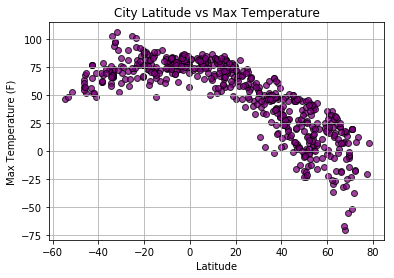

<Figure size 432x288 with 0 Axes>

In [57]:
plt.scatter(lat, max_temp, marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.show()
plt.savefig("city_lat_vs_max_temp.png")


#### Latitude vs. Humidity Plot

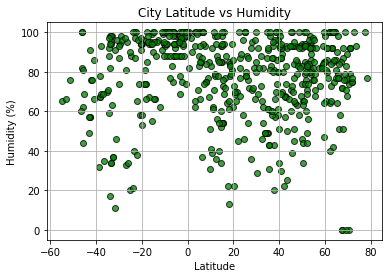

<Figure size 432x288 with 0 Axes>

In [58]:
plt.scatter(lat, humidity, marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.show()
plt.savefig("city_lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

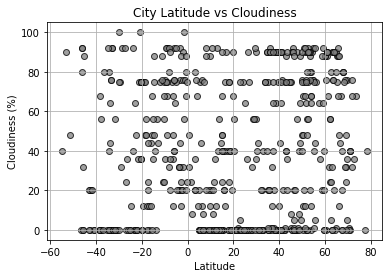

<Figure size 432x288 with 0 Axes>

In [59]:
plt.scatter(lat, cloudiness, marker="o", facecolors="gray", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.show()
plt.savefig("city_lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

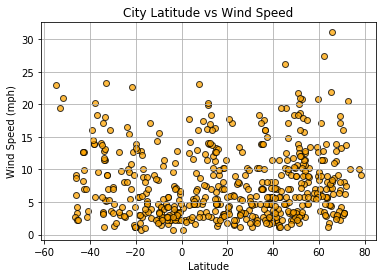

<Figure size 432x288 with 0 Axes>

In [60]:
plt.scatter(lat, wind_speed, marker="o", facecolors="orange", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.show()
plt.savefig("city_lat_vs_wind_speed.png")

In [ ]:
#Analysis
#Of the four categories max temperature, humidity, cloudiness, and wind speed, only max temperature appears to be closely correlated
# with the city's latitude.  The scatter plot diagram shows a strong correlation because the dots are close together.  
#The shape is a downward curve as the cities move north of the equator which is zero degrees.  

#The scatter plot shape comparing city and humidity is a straight, horizontal line so this means there is no correlation.  
#Cities with 100% humidity are found below, at, and above the equator.  

#Regarding cloudiness, there are several patterns of straignt, horizontal lines throughout the scatter plot which also indicates
# no correlation between cloudiness and city latitude to prove what the weather is like near the equator.  

#Finally, wind speed is also not an appropriate way to determine what weather is like near the equator because the dot are 
# concentrated near toward the lower wind speed but the shape is horizontal indicating no correlation. 